**Question 4** Thinking geometrically.

Below, a dataset and its linear regression solution are provided. Let $c_1, c_2, c_3, c_4,$ and $c_5$ be the five columns in the feature matrix. Randomly sample five real values $u_1, u_2, u_3, u_4, u_5$ from a uniform distribution $(0, 1)$ and generate a new vector by using these values to linearly combine the aforementioned columns: $c = \sum_{i=1}^5 u_i c_i$. Calculate the inner product $c^\top (y-\hat{y})$, where $y$ is the training target vector and $\hat{y}$ is the predicted target vector. Why do you get such result?

Additionally, what is the value of $\hat{y}^\top (y-\hat{y})$? Explain why this value is what it is.

You may choose to verify your answer through coding. Note that very small values (e.g., $\leq 1e-10$) can be treated as zeros.

* A: The inner product $c^T(y-\hat{y})$ is 0 because the residuals $y-\hat y$ are orthogonal to the column space of the feature matrix. The value of $\hat{y^T}(y-\hat y)$ is 0 because $\hat y$ lies in the column space of the feature matrix, making the projection of the residuals in the direction of $\hat y$ zero. 

In [3]:
import numpy as np
import math
pi=math.pi
# generate 10 numbers from -1 to 1 with equal stepsize
x=np.linspace(-1,1,10)

# generate training target (noise contaminated!)
y=np.sin(2*pi*.5*x)+0.4*np.random.randn(x.size)

M = 5
basis = np.arange(M+1)
X = x[:, np.newaxis]**basis[np.newaxis, :]

w = np.linalg.solve(X.T@X, X.T@y)
yhat = X.dot(w)
r = y-yhat

In [4]:
# Randomly sample 5 values u1, u2, ... , u5 from uniform distribution (0,1)

import random

u = []
for i in range(5):
    u.append(random.uniform(0,1))

# Add zero at first index of list
u.insert(0, 0)

In [5]:
au = np.array(u)

au

array([0.        , 0.21409892, 0.52571226, 0.10025532, 0.49887566,
       0.95801921])

In [ ]:
X

In [6]:
# Column vector c

c = X@au
print(c.shape)
cT = c.T
print(cT.shape)             # np treats both as the same

print(c)

(10,)
(10,)
[-0.24778554  0.01421579  0.02294486 -0.0144505  -0.01737621  0.03050883
  0.14359337  0.39661454  0.98695855  2.29696138]


Calculate the inner product $c^\top (y-\hat{y})$

In [7]:
# Inner product

A = np.dot(c.T,r)
A

1.27675647831893e-15

- A: The inner product is approximately 0.

Inner product $\hat{y}^\top (y-\hat{y})$

In [8]:
# Inner product

B = np.dot(yhat.T,r)
B

-6.933689733479298e-14

- A: The inner product is approximately 0.

**Question 5** Investigating Solution Sensitivity.

1. Determine the solution using the Singular Value Decomposition (SVD) of the data matrix and the training target $y$. You must **not** use any pre-existing API for this task. Ensure that your computations avoid any matrix-matrix products. Your final solution should match the one obtained using `np.linalg.lstsq()`.

**Note:** The order of computations is crucial in matrix calculations as it can significantly affect computational costs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
pi=math.pi
# generate 10 numbers from -1 to 1 with equal stepsize
x=np.linspace(-1,1,50)
# generate training target (noise contaminated!)
y=np.sin(2*pi*.5*x)+0.4*np.random.randn(x.size)
print('y: ', y.shape)

M = 10
basis = np.arange(M+1)
X = x[:, np.newaxis]**basis[np.newaxis, :]

# https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html
U, S, VT = np.linalg.svd(X)
print('Singular vectors: ', U.shape)
print('Singular values: ', S.shape)
print('Eigen vectors: ', VT.shape)

def getbysvd():
  # TODO: Please fill the function to compute the linear regression solution
  # on dataset (X, y) which is already provided
  # the computation should NOT involve matrix-matrix product,
  # matrix-vector product is fine
  # and should NOT use any solution API like np.linalg.solve, etc.

  # Attempt 1:

  # A = U.T@y
  # print('A shape: ', A.shape)

  # identity = np.identity(11)

  # print(S)
  # S_matrix = identity*S
  # print('S matrix shape: ', S_matrix.shape)

  # inv = np.linalg.inv(S_matrix)
  # print('S inverse matrix shape: ', inv.shape)

  # B = inv@A
  # print(B)

  # theta = VT@B

  # Attempt 2:
  lst = [(U[:,i]@y)*VT[i,:]/S[i] for i  in range(M+1)]
  print(lst)

  theta = sum(lst)

  return theta

getbysvd()

theta = getbysvd()
thetabylstsq = np.linalg.lstsq(X, y)[0]

print('theta: \n', theta, '\nthetabylstsq: \n', thetabylstsq)

print("if your computation is correct, here should print out true :: ", np.allclose(theta, thetabylstsq))

y:  (50,)
Singular vectors:  (50, 50)
Singular values:  (11,)
Eigen vectors:  (11, 11)
[array([ 6.45562003e-02, -2.54009988e-17,  2.77317255e-02, -1.22389606e-17,
        1.91418525e-02, -1.09996201e-17,  1.50998201e-02, -1.00360521e-17,
        1.27098505e-02, -9.74124443e-18,  1.11213066e-02]), array([ 1.67001374e-16,  3.13299383e-01, -0.00000000e+00,  2.22871251e-01,
       -0.00000000e+00,  1.78517291e-01,  5.21339175e-17,  1.51635709e-01,
       -1.30334794e-17,  1.33476646e-01,  3.91004381e-17]), array([-8.81772415e-02,  1.92694691e-17,  6.12712871e-02,  4.49004387e-18,
        7.20358100e-02, -3.73484627e-18,  7.04051316e-02, -5.49708096e-18,
        6.67986481e-02, -1.11794235e-17,  6.31422799e-02]), array([-2.15414112e-15,  1.47648271e+00,  1.03639796e-14, -2.26784618e-01,
        1.92818226e-15, -7.46699635e-01, -3.01278478e-15, -9.41956655e-01,
       -5.30250121e-15, -1.01818777e+00, -7.65247334e-15]), array([ 6.22960679e-03,  1.88960991e-16, -2.90327665e-02, -3.70023225e-1

C:\Users\fuwen\AppData\Local\Temp\ipykernel_29532\1563540021.py:58: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  thetabylstsq = np.linalg.lstsq(X, y)[0]


2. There are various definitions of sensitivity. In this exercise, 'sensitivity' refers to the extent to which a model's output is perturbed when noise is added to the input. How does sensitivity change as regularization increases? Please visualize the change in sensitivity as regularization increases using a separate figure.

* A: The sensitivity (extent to which the model's output is perturbed) is decreased as regularisation increases (fitted has less perturbation from the true) due to the constraints imposed on the model's parameters.

3. **Without using an additional regularization term**, can you identify another method to reduce sensitivity? Hint: Review the documentation for the `lstsq` function (doc: [numpy.linalg.lstsq](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html#numpy.linalg.lstsq)). Please empirically test if this method works and explain why.

* A: The rcond optional parameter can be used to set a cut-off for small singular values of a, effectively ignoring them during the least squares computation process (lstsq).

4. **Relationship Between Sensitivity and Overfitting**:
   - Do you think reducing sensitivity can always reduce overfitting?
   - Conversely, do you think reducing overfitting can always reduce sensitivity?
   
   Please share your thoughts and reasoning on these questions.

* A: They are not perfectly correlated, and both depend on the specific dataset and learning task. Additionally, boosting can reduce overfitting but might increase sensitivity.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math
pi=math.pi
# generate 10 numbers from -1 to 1 with equal stepsize
x=np.linspace(-1,1,10)

# generate training target (noise contaminated!)
y=np.sin(2*pi*.5*x)+0.4*np.random.randn(x.size)

# define a validation set
xv=np.linspace(-1,1,20)
yv=np.sin(2*pi*.5*xv)+0.4*np.random.randn(xv.size)

Using lstsq optional parameter - rcond

(10, 31)
(10, 31)
(10, 31)
(10, 31)
(10, 31)
(10, 31)


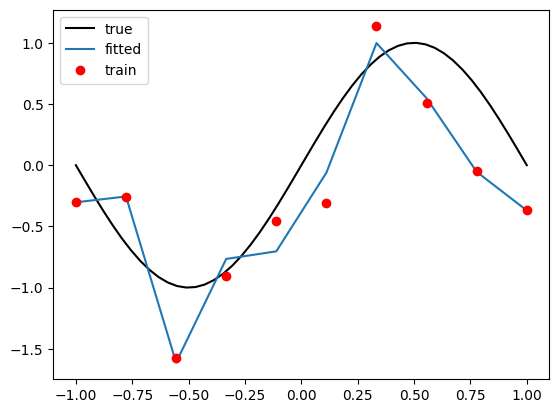

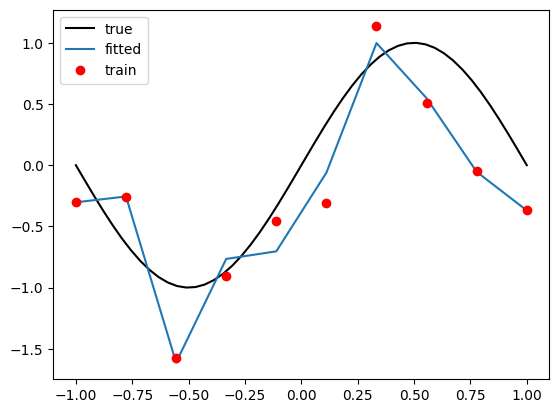

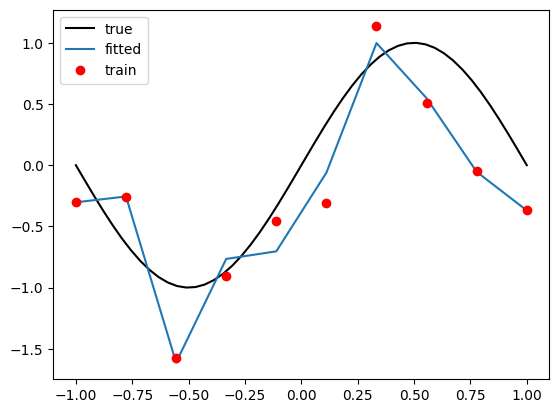

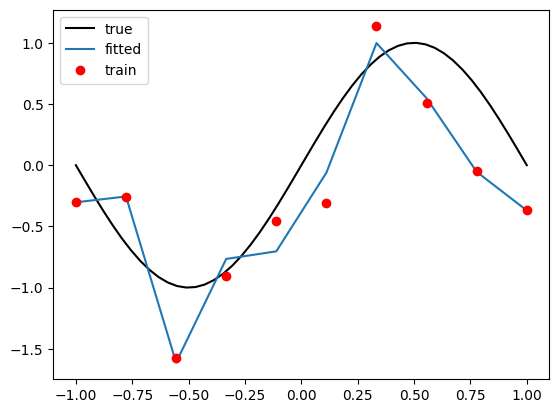

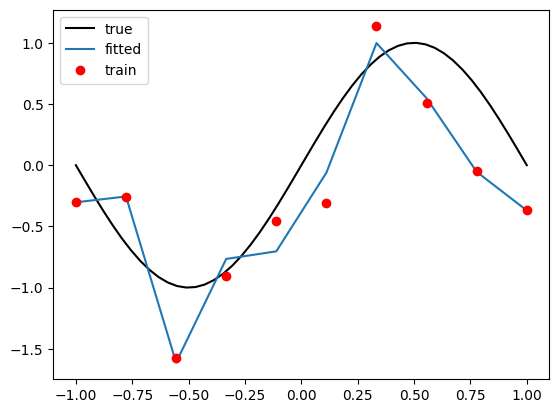

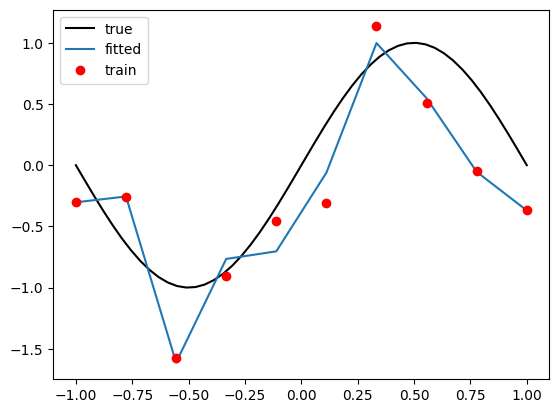

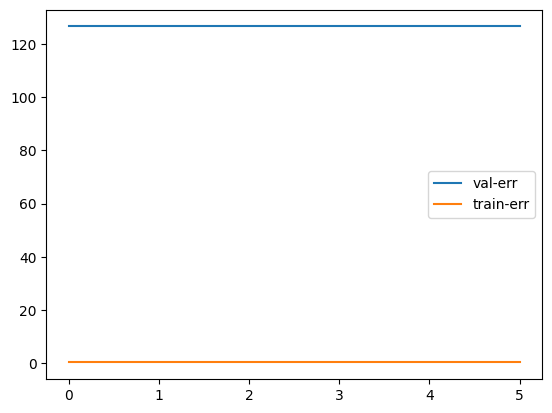

In [13]:
def get_sensi(theta, xtilde):
  yhat_orig = xtilde@theta
  yhat_p = (xtilde+np.random.normal(0., 0.2, xtilde.shape))@theta
  return np.linalg.norm(yhat_p-yhat_orig)/np.linalg.norm(yhat_orig)

np.random.seed(0)
error_val= []
error_train = []
sensi = []

# try increasing number of basis
reglist = [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1]
for reg in reglist:
  plt.figure()

  # always show the true function
  # plot the true function
  plt.plot(np.linspace(-1,1,50), np.sin(2*pi*.5*np.linspace(-1,1,50)), 'black', label='true')

  M = 30
  basis = np.arange(M+1)
  X = x[:, np.newaxis]**basis[np.newaxis, :]
  print(X.shape)

  theta = np.linalg.lstsq(X, y, rcond=0.001)[0]
  
  yhat = X@theta
  # plot the fitted function
  plt.plot(x,yhat, label='fitted')

  # plot the train and validation data
  plt.plot(x,y,'ro', label='train')

  # show labels
  plt.legend()

  # compute val error and train error
  Xv = xv[:, np.newaxis]**basis[np.newaxis, :]
  yhat_val = Xv@theta
  error = np.sum((yv - yhat_val)**2)
  error_t = np.sum((y - yhat)**2)

  error_val.append(error)
  error_train.append(error_t)

plt.figure()

plt.plot(error_val, label='val-err')
plt.plot(error_train, label='train-err')
plt.legend()

(10, 31)
(10, 31)
(10, 31)
(10, 31)
(10, 31)
(10, 31)


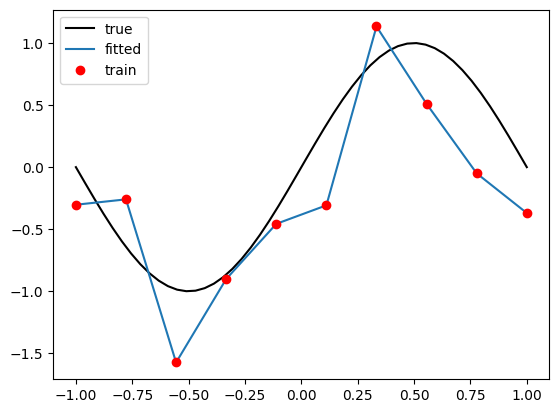

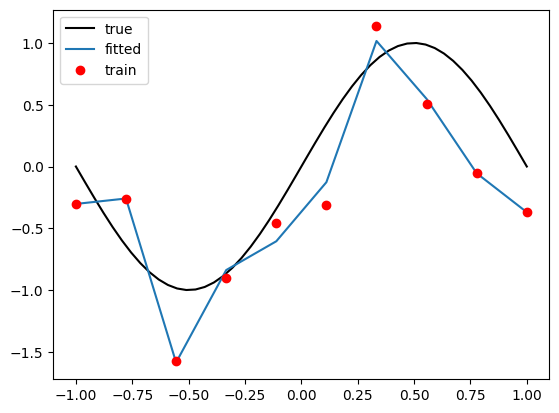

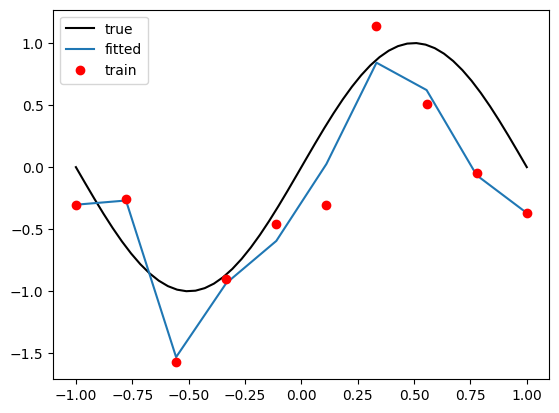

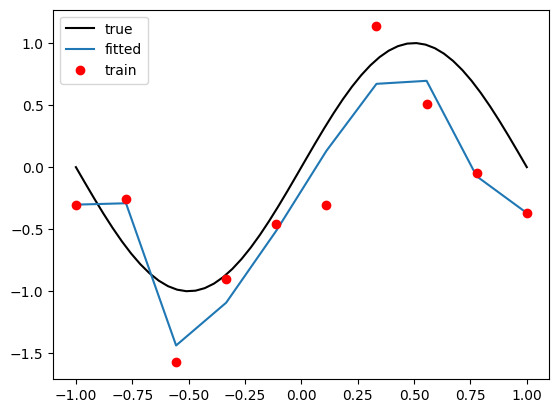

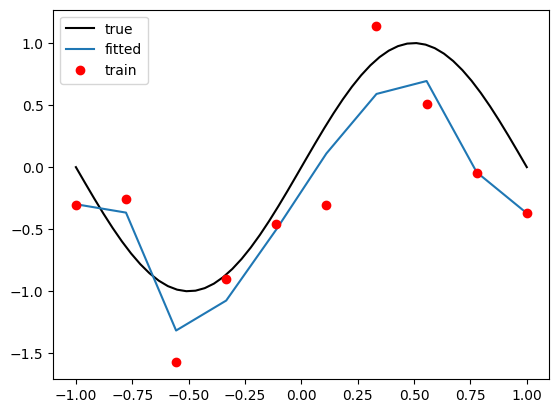

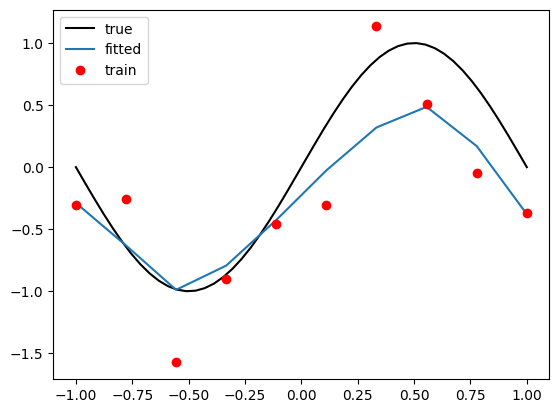

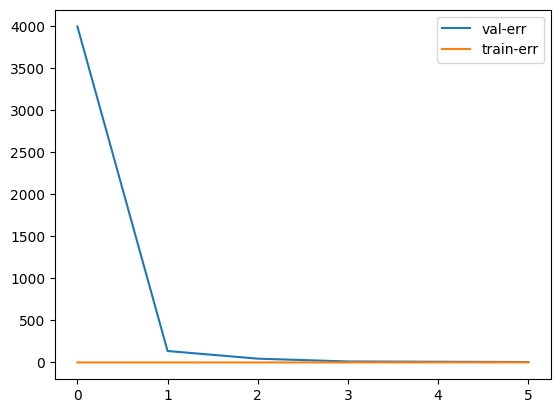

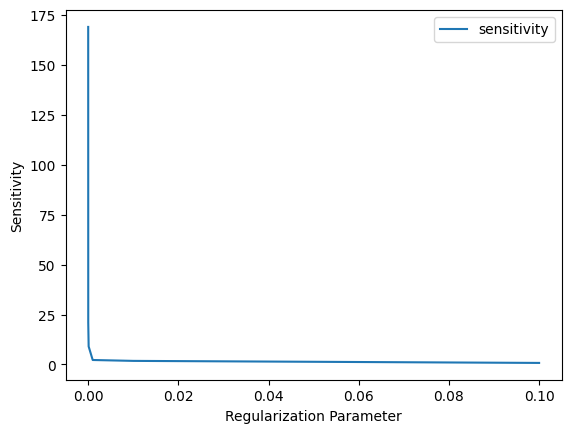

In [15]:
def get_sensi(theta, xtilde):
  yhat_orig = xtilde@theta
  yhat_p = (xtilde+np.random.normal(0., 0.2, xtilde.shape))@theta
  return np.linalg.norm(yhat_p-yhat_orig)/np.linalg.norm(yhat_orig)

np.random.seed(0)
error_val= []
error_train = []
sensi = []

# try increasing number of basis
reglist = [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1]
for reg in reglist:
  plt.figure()

  # always show the true function
  # plot the true function
  plt.plot(np.linspace(-1,1,50), np.sin(2*pi*.5*np.linspace(-1,1,50)), 'black', label='true')

  M = 30
  basis = np.arange(M+1)
  X = x[:, np.newaxis]**basis[np.newaxis, :]
  print(X.shape)

  theta = np.linalg.solve(X.T@X + reg*np.eye(X.shape[1]), X.T@y)
  
  yhat = X@theta
  # plot the fitted function
  plt.plot(x,yhat, label='fitted')

  # plot the train and validation data
  plt.plot(x,y,'ro', label='train')

  # show labels
  plt.legend()

  # compute val error and train error
  Xv = xv[:, np.newaxis]**basis[np.newaxis, :]
  yhat_val = Xv@theta
  error = np.sum((yv - yhat_val)**2)
  error_t = np.sum((y - yhat)**2)

  error_val.append(error)
  error_train.append(error_t)

  # Calculate sensitivity
  sensi_val = get_sensi(theta, X)
  sensi.append(sensi_val)

plt.figure()

plt.plot(error_val, label='val-err')
plt.plot(error_train, label='train-err')
plt.legend()

# Plot the sensitivity
plt.figure()
plt.plot(reglist, sensi, label='sensitivity')
plt.xlabel('Regularization Parameter')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

Visualize how validation error changes as we increase basis

(10, 2)
(10, 11)
(10, 21)
(10, 31)
(10, 41)


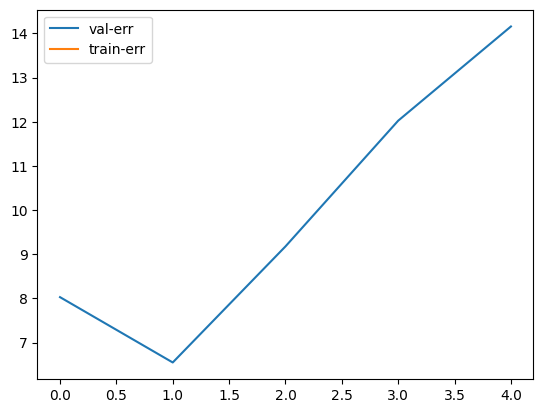

In [14]:
# TODO: add a plot to visualize how validation error changes as we increase basis

np.random.seed(0)
error_val= []
error_train = []
sensi = []

reg = 0.001
for M in [1, 10, 20, 30, 40]:
  basis = np.arange(M+1)
  X = x[:, np.newaxis]**basis[np.newaxis, :]
  print(X.shape)

  theta = np.linalg.solve(X.T@X + reg*np.eye(X.shape[1]), X.T@y)
  yhat = X@theta

  # compute val error
  Xv = xv[:, np.newaxis]**basis[np.newaxis, :]
  yhat_val = Xv@theta
  error = np.sum((yv - yhat_val)**2)

  error_val.append(error)

plt.figure()

plt.plot(error_val, label='val-err')
plt.plot(error_train, label='train-err')
plt.legend()